In [4]:
import pandas as pd
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt

from scipy.optimize import minimize

import sys
sys.path.insert(0, '../scripts/')
import utils as utl

## Predict

In [53]:
def log_reg_predict(w, X):
    return (w*X).sum(axis=1)

# Cost functions

In [87]:
def log_cost_function(w: np.array, X: np.array, y: np.array) -> float:
    """Calculates the log cost function for binary logistic regression

    Parameters
    ----------
    w : np.array
        Weights
    X : np.array
        Input values
    y : np.array
        Expected outputs

    Returns
    -------
    float
        Logistic cost function result
    """
    y_pred = log_reg_predict(w, X)
    den = 1 + np.exp(y_pred)
    den[den == 0] = 1
    h = 1/den
    h[h==0]=1e-4
    h[h==1]=1-1e-4
    return - (1/len(X))*np.sum(y*np.log(h) + (1-y)*np.log(1-h))

In [88]:
def lcf_for_min(w: np.array, *args: Tuple[np.array, np.array]) -> float:
    """Calculates the log cost function for binary logistic regression in format necessary for minimization algorithm

    Parameters
    ----------
    w : np.array
        _description_

    **args: Tuple[np.array, np.array]
        np.array: Input values X
        np.array: Expected outputs y
    Returns
    -------
    float
        Logistic cost function result
    """
    X = args[0]
    y = args[1]
    return log_cost_function(w, X, y)

In [89]:
df = pd.read_csv('../data/1.raw/Stars.csv')#, parse_dates=['DateTime'],index_col=['DateTime'])

X_cols = ['Temperature', 'L', 'R', 'A_M']
y_col = 'Type'

X = df[X_cols]
for c in X.columns:
    X[c] = utl.min_max_scaling(X[c])[0]

y = df[y_col]

C:\Users\an2fe\AppData\Local\Temp\ipykernel_13964\2331883109.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c] = utl.min_max_scaling(X[c])[0]


In [90]:
y_res = pd.DataFrame()
for cat in y.unique():
    y_np = y.copy().to_numpy()
    y_np[y_np!=cat]=-1
    y_np[y_np==cat]=1
    y_np[y_np==-1]=0
    y_res[cat] = y_np

In [91]:
X_mod = X.copy()
ones_aux = np.ones(X.shape[0])
X_mod['bias_col'] = ones_aux
cols = X_mod.columns
cols_reordered = [cols[i-1] for i,x in enumerate(cols)]
X_mod = X_mod[cols_reordered]
X_np = X_mod.to_numpy()
m = len(X_mod)


# Inicializes data
J = np.ones(len(y_res.columns))
w_df = pd.DataFrame()
for i,val in enumerate(y_res.columns):
    w_df[val] = 0.5*np.ones(X.shape[1]+1)
w = w_df.to_numpy()
y_c = y_res.to_numpy()

# Minimizes the cost function
for i,val in enumerate(y_res.columns):
    res = minimize(lcf_for_min, w[:,i], args=(X_np, y_c[:,i]))
    w[:,i] = res.x

w

C:\Users\an2fe\AppData\Local\Temp\ipykernel_13964\2573357931.py:19: RuntimeWarning: overflow encountered in exp
  den = 1 + np.exp(y_pred)
C:\Users\an2fe\AppData\Local\Temp\ipykernel_13964\2573357931.py:19: RuntimeWarning: overflow encountered in exp
  den = 1 + np.exp(y_pred)


array([[ 2.37591275e+02, -2.99084984e+01,  5.15782472e+02,
        -4.86202245e+02, -1.60447303e+02,  1.88914884e+02],
       [ 2.26304938e+02,  1.68255386e+02, -1.02449365e+03,
        -1.08775258e+02,  1.44934640e+02, -1.89068474e-01],
       [ 1.29524114e+02,  1.63036503e+02,  2.08837576e+04,
         5.15691462e+02, -3.51311699e+02, -2.44826511e+02],
       [ 1.21251810e+02,  7.18043895e+01,  4.66760329e+03,
         5.01608175e+04,  9.41367866e+02, -6.39939701e+02],
       [-2.85419459e+02,  2.96278904e+01, -4.69569910e+02,
         8.00126303e+02,  5.60291483e+02,  5.71304418e+02]])

In [97]:
# Predictions
y_pred = pd.DataFrame()
for i,val in enumerate(y_res.columns):
    y_pred[val] = log_reg_predict(w[:,i], X_np)

for c in y_pred.columns:
    y_pred[c] = utl.min_max_scaling(y_pred[c])[0]

orig_cols = y_pred.columns
y_pred['res'] = y_pred.apply(lambda x: np.argmax(x[orig_cols].to_numpy()) ,axis =1)

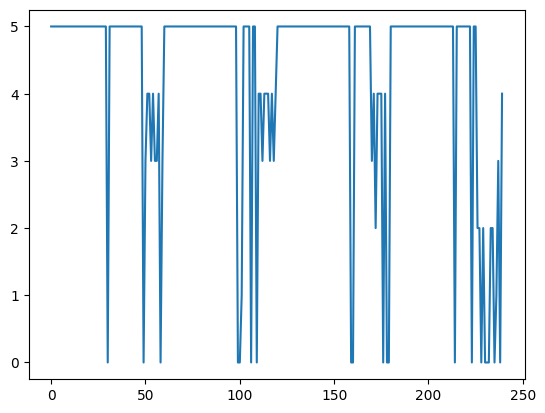

In [100]:
plt.plot(y_pred['res'])
# for c in y_pred.columns:
#     plt.plot(y_pred[c])
# plt.show()

In [81]:
np.log([0,1])

C:\Users\an2fe\AppData\Local\Temp\ipykernel_13964\1899684472.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0,1])


array([-inf,   0.])